# **Automatidata project**
**Course 6 - The Nuts and bolts of machine learning**

You are a data professional in a data analytics firm called Automatidata. Their client, the New York City Taxi & Limousine Commission (New York City TLC), was impressed with the work you have done and has requested that you build a machine learning model to predict if a customer will not leave a tip. They want to use the model in an app that will alert taxi drivers to customers who are unlikely to tip, since drivers depend on tips.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 6 End-of-course project: Build a machine learning model

In this activity, you will practice using tree-based modeling techniques to predict on a binary target class.  
<br/>   

**The purpose** of this model is to find ways to generate more revenue for taxi cab drivers.  
  
**The goal** of this model is to predict whether or not a customer is a generous tipper.  
<br/>  

*This activity has three parts:*

**Part 1:** Ethical considerations 
* Consider the ethical implications of the request 

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, complete an Executive Summary using the questions listed on the PACE Strategy Document. 

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work. 



# Build a machine learning model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: Plan 

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:

1.   What are you being asked to do?


2.   What are the ethical implications of the model? What are the consequences of your model making errors?
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a customer will give a tip, but they actually won't)?
  
  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a customer will not give a tip, but they actually will)?  
  
  
3.   Do the benefits of such a model outweigh the potential problems?
  
4.   Would you proceed with the request to build this model? Why or why not?
 
5.   Can the objective be modified to make it less problematic?
 


**1.**
* I'm being asked to build a random forest model to identify the key factors that predict if a customer will not leave a tip. My final deliverable is an executive summary explaining what variables the model uses and how accurate its predictions are.

**2.**
* **Ethical Implication**: The primary ethical implication is algorithmic bias. The model could learn to associate certain neighborhoods with lower tips, potentially leading to drivers avoiding those areas and creating discriminatory, inequitable service for residents.

* **Consequences of Model Errors**
    * **A False Positive** (predicting a high tip that doesn't occur) leads to driver disappointment and erodes trust in the system.
    * **A False Negative** (failing to predict a high tip that would have occurred) is more severe. It causes a driver to miss out on income and can lead to deserving riders being passed over, worsening service quality in some areas.
    
**3.**
* **Yes**, but only with strict ethical oversight.
* The potential to increase driver satisfaction is a significant benefit. However, it is only justifiable if we are committed to actively identifying and mitigating the serious risk of algorithmic bias to ensure the model does not lead to discriminatory service for any community.

**4.**
* **Yes**, I would proceed with the request.
* I'd do so because the potential benefit of improving driver satisfaction is substantial. The ethical risks, while serious, are manageable. My plan includes specific, rigorous steps to test for and mitigate bias, ensuring we can create a valuable tool responsibly without causing discriminatory outcomes.

**5.**
* **Yes**. The objective can be modified to be significantly less problematic.
* Instead of predicting if an individual ride will be high-tip, we can change the objective to identifying the universal, controllable factors that lead to higher tips system-wide.
* This shifts the focus from a potentially discriminatory tool (avoiding "low-tip" riders) to a constructive one that generates insights (e.g., "promoting credit card payments increases tips") that can be used to help all drivers.

Suppose you were to modify the modeling objective so, instead of predicting people who won't tip at all, you predicted people who are particularly generous&mdash;those who will tip 20% or more? Consider the following questions:

1.  What features do you need to make this prediction?

2.  What would be the target variable?  

3.  What metric should you use to evaluate your model? Do you have enough information to decide this now?


**1.**
* **Core Trip Details:** `passenger_count`, `trip_distance`, `fare_amount`, and the calculated `trip_duration`.
* **Time-Based Features:** The hour of the day and the day of the week the trip started.
* **Location-Based Averages:** The mean trip duration, mean distance, and predicted fare associated with the pickup location.

**2.** The target variable would be a new, binary column that indicates whether a tip is generous or not. For each trip, this variable would be:
* 1 if the `tip_amount` is 20% or more of the `fare_amount`.
* 0 if the `tip_amount` is less than 20% of the `fare_amount`.

**3.** The best metrics to evaluate this model are *precision*, *recall*, and the *F1-score*, viewed alongside a confusion matrix.

* *Precision* would measure the percentage of predicted "generous" tippers who were actually generous.
* *Recall* would measure the percentage of all actual generous tippers that the model successfully identified.
* The *F1-score* provides a single value that balances the trade-off between *precision* and *recall*.
* Using accuracy alone would be misleading, as the number of "generous" tippers is likely much smaller than "non-generous" ones.

Yes, we have enough information to decide this now. The choice of metric is driven by the business problem—a binary classification task where we want to reliably identify a specific group (the minority class)—and we have a clear definition of that problem.


**_Complete the following steps to begin:_**

### **Task 1. Imports and data loading**

Import packages and libraries needed to build and evaluate random forest and XGBoost classification models.

In [1]:
# Import packages and libraries
### YOUR CODE HERE ###
import numpy as np, pandas as pd, seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

In [2]:
# RUN THIS CELL TO SEE ALL COLUMNS 
# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

Begin by reading in the data. There are two dataframes: one containing the original data, the other containing the mean durations, mean distances, and predicted fares from the previous course's project called nyc_preds_means.csv.

**Note:** `Pandas` reads in the dataset as `df0`, now inspect the first five rows. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THE CELL BELOW TO IMPORT YOUR DATA. 

# Load dataset into dataframe
df0 = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

# Import predicted fares and mean distance and duration from previous course
nyc_preds_means = pd.read_csv('nyc_preds_means.csv')

Inspect the first few rows of `df0`.


In [4]:
# Inspect the first few rows of df0
### YOUR CODE HERE ###
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


Inspect the first few rows of `nyc_preds_means`.

In [5]:
# Inspect the first few rows of `nyc_preds_means`
### YOUR CODE HERE ###
nyc_preds_means.head()

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.434245
1,24.470370,3.108889,16.052218
2,7.250000,0.881429,7.053706
3,30.250000,3.700000,18.731650
4,14.616667,4.435000,15.845642


#### Join the two dataframes

Join the two dataframes using a method of your choice.

In [6]:
# Merge datasets
### YOUR CODE HERE ###
df0 = pd.concat([df0, nyc_preds_means], axis=1)

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

Consider the questions in your PACE Strategy Documentto reflect on the Analyze stage.

### **Task 2. Feature engineering**

You have already prepared much of this data and performed exploratory data analysis (EDA) in previous courses. 

Call `info()` on the new combined dataframe.

In [7]:
#==> ENTER YOUR CODE HERE
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

You know from your EDA that customers who pay cash generally have a tip amount of $0. To meet the modeling objective, you'll need to sample the data to select only the customers who pay with credit card. 

Copy `df0` and assign the result to a variable called `df1`. Then, use a Boolean mask to filter `df1` so it contains only customers who paid with credit card.

In [8]:
# Subset the data to isolate only customers who paid by credit card
#==> ENTER YOUR CODE HERE
df1 = df0[df0.payment_type == 1]

##### **Target**

Notice that there isn't a column that indicates tip percent, which is what you need to create the target variable. You'll have to engineer it. 

Add a `tip_percent` column to the dataframe by performing the following calculation:  
<br/>  


$$tip\ percent = \frac{tip\ amount}{total\ amount - tip\ amount}$$  

Round the result to three places beyond the decimal. **This is an important step.** It affects how many customers are labeled as generous tippers. In fact, without performing this step, approximately 1,800 people who do tip ≥ 20% would be labeled as not generous. 

To understand why, you must consider how floats work. Computers make their calculations using floating-point arithmetic (hence the word "float"). Floating-point arithmetic is a system that allows computers to express both very large numbers and very small numbers with a high degree of precision, encoded in binary. However, precision is limited by the number of bits used to represent a number, which is generally 32 or 64, depending on the capabilities of your operating system. 

This comes with limitations in that sometimes calculations that should result in clean, precise values end up being encoded as very long decimals. Take, for example, the following calculation:


In [9]:
# Run this cell
1.1 + 2.2

3.3000000000000003

Notice the three that is 16 places to the right of the decimal. As a consequence, if you were to then have a step in your code that identifies values ≤ 3.3, this would not be included in the result. Therefore, whenever you perform a calculation to compute a number that is then used to make an important decision or filtration, round the number. How many degrees of precision you round to is your decision, which should be based on your use case. 

Refer to this [guide for more information related to floating-point arithmetic](https://floating-point-gui.de/formats/fp/).  

In [10]:
# Create tip % col
#==> ENTER YOUR CODE HERE
df1['tip_percent'] = (df1.tip_amount / (df1.total_amount - df1.tip_amount)).round(4)
df1['tip_percent'].head()

0    0.2000
1    0.2381
2    0.1986
3    0.3000
5    0.2000
Name: tip_percent, dtype: float64

Now create another column called `generous`. This will be the target variable. The column should be a binary indicator of whether or not a customer tipped ≥ 20% (0=no, 1=yes).

1. Begin by making the `generous` column a copy of the `tip_percent` column.
2. Reassign the column by converting it to Boolean (True/False).
3. Reassign the column by converting Boolean to binary (1/0).

In [11]:
# Create 'generous' col (target)
#==> ENTER YOUR CODE HERE
df1['generous'] = (df1['tip_percent'] >= .2).astype(int)

<details>
  <summary><h5>HINT</h5></summary>

To convert from Boolean to binary, use `.astype(int)` on the column.
</details>

#### Create day column

Next, you're going to be working with the pickup and dropoff columns.

Convert the `tpep_pickup_datetime` and `tpep_dropoff_datetime` columns to datetime.

In [12]:
# Convert pickup and dropoff cols to datetime
#==> ENTER YOUR CODE HERE
df1.tpep_dropoff_datetime = pd.to_datetime(df1.tpep_dropoff_datetime)
df1.tpep_pickup_datetime = pd.to_datetime(df1.tpep_pickup_datetime)

Create a `day` column that contains only the day of the week when each passenger was picked up. Then, convert the values to lowercase.

In [13]:
# Create a 'day' col
#==> ENTER YOUR CODE HERE
df1['day'] = df1.tpep_pickup_datetime.dt.day_name().str.lower()


<details>
  <summary><h5>HINT</h5></summary>

To convert to day name, use `dt.day_name()` on the column.
</details>

#### Create time of day columns

Next, engineer four new columns that represent time of day bins. Each column should contain binary values (0=no, 1=yes) that indicate whether a trip began (picked up) during the following times:

`am_rush` = [06:00&ndash;10:00)  
`daytime` = [10:00&ndash;16:00)  
`pm_rush` = [16:00&ndash;20:00)  
`nighttime` = [20:00&ndash;06:00)  

To do this, first create the four columns. For now, each new column should be identical and contain the same information: the hour (only) from the `tpep_pickup_datetime` column.

In [14]:
# df1.tpep_pickup_datetime.dt.hour
# Create 'am_rush' col
#==> ENTER YOUR CODE HERE
df1['am_rush'] = df1.tpep_pickup_datetime.dt.hour

# Create 'daytime' col
#==> ENTER YOUR CODE HERE
df1['daytime'] = df1.tpep_pickup_datetime.dt.hour

# Create 'pm_rush' col
#==> ENTER YOUR CODE HERE
df1['pm_rush'] = df1.tpep_pickup_datetime.dt.hour

# Create 'nighttime' col
#==> ENTER YOUR CODE HERE
df1['nighttime'] = df1.tpep_pickup_datetime.dt.hour

You'll need to write four functions to convert each new column to binary (0/1). Begin with `am_rush`. Complete the function so if the hour is between [06:00–10:00), it returns 1, otherwise, it returns 0.

In [15]:
# Define 'am_rush()' conversion function [06:00–10:00)
def am_rush(hour):
    return int((hour >= 6) & (hour < 10))

Now, apply the `am_rush()` function to the `am_rush` series to perform the conversion. Print the first five values of the column to make sure it did what you expected it to do.

**Note:** Be careful! If you run this cell twice, the function will be reapplied and the values will all be changed to 0.

In [16]:
# Apply 'am_rush' function to the 'am_rush' series
#==> ENTER YOUR CODE HERE
df1['am_rush'] = df1['am_rush'].apply(am_rush)

Write functions to convert the three remaining columns and apply them to their respective series.

In [17]:
# Define 'daytime()' conversion function [10:00–16:00)
#==> ENTER YOUR CODE HERE
def daytime(hour):
    return int((hour >= 10) & (hour < 16))

In [18]:
# Apply 'daytime()' function to the 'daytime' series
#==> ENTER YOUR CODE HERE
df1['daytime'] = df1['daytime'].apply(daytime)

In [19]:
# Define 'pm_rush()' conversion function [16:00–20:00)
#==> ENTER YOUR CODE HERE
def pm_rush(hour):
    return int((hour >= 16) & (hour < 20))

In [20]:
# Apply 'pm_rush()' function to the 'pm_rush' series
#==> ENTER YOUR CODE HERE
df1['pm_rush'] = df1['pm_rush'].apply(pm_rush)

In [21]:
# Define 'nighttime()' conversion function [20:00–06:00)
#==> ENTER YOUR CODE HERE
def nighttime(hour):
    return int((hour >= 20) | (hour < 6))

In [22]:
# Apply 'nighttime' function to the 'nighttime' series
#==> ENTER YOUR CODE HERE
df1['nighttime'] = df1['nighttime'].apply(nighttime)

#### Create `month` column

Now, create a `month` column that contains only the abbreviated name of the month when each passenger was picked up, then convert the result to lowercase.

<details>
  <summary><h5>HINT</h5></summary>

Refer to the [strftime cheatsheet](https://strftime.org/) for help.
</details>

In [23]:
# Create 'month' col
#==> ENTER YOUR CODE HERE
df1['month'] = df1.tpep_pickup_datetime.dt.strftime('%b')

Examine the first five rows of your dataframe.

In [24]:
#==> ENTER YOUR CODE HERE
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent,generous,day,am_rush,daytime,pm_rush,nighttime,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245,0.2000,1,saturday,1,0,0,0,Mar
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218,0.2381,1,tuesday,0,1,0,0,Apr
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706,0.1986,0,friday,1,0,0,0,Dec
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650,0.3000,1,sunday,0,1,0,0,May
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,11.855376,2.052258,10.441351,0.2000,1,saturday,0,0,0,1,Mar


#### Drop columns

Drop redundant and irrelevant columns as well as those that would not be available when the model is deployed. This includes information like payment type, trip distance, tip amount, tip percentage, total amount, toll amount, etc. The target variable (`generous`) must remain in the data because it will get isolated as the `y` data for modeling.

In [25]:
# Drop columns
#==> ENTER YOUR CODE HERE
cols_to_drop = [
    'Unnamed: 0', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
    'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID',
    'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
    'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
    'tip_percent' # Also drop the intermediate tip_percent column
]
df1.drop(cols_to_drop, axis=1, inplace=True)

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15265 entries, 0 to 22698
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         15265 non-null  int64  
 1   passenger_count  15265 non-null  int64  
 2   mean_duration    15265 non-null  float64
 3   mean_distance    15265 non-null  float64
 4   predicted_fare   15265 non-null  float64
 5   generous         15265 non-null  int64  
 6   day              15265 non-null  object 
 7   am_rush          15265 non-null  int64  
 8   daytime          15265 non-null  int64  
 9   pm_rush          15265 non-null  int64  
 10  nighttime        15265 non-null  int64  
 11  month            15265 non-null  object 
dtypes: float64(3), int64(7), object(2)
memory usage: 1.5+ MB


#### Variable encoding

Many of the columns are categorical and will need to be dummied (converted to binary). Some of these columns are numeric, but they actually encode categorical information, such as `RatecodeID` and the pickup and dropoff locations. To make these columns recognizable to the `get_dummies()` function as categorical variables, you'll first need to convert them to `type(str)`. 

1. Define a variable called `cols_to_str`, which is a list of the numeric columns that contain categorical information and must be converted to string: `RatecodeID`, `PULocationID`, `DOLocationID`.
2. Write a for loop that converts each column in `cols_to_str` to string.


In [27]:
# 1. Define list of cols to convert to string
#==> ENTER YOUR CODE HERE

# 2. Convert each column to string
#==> ENTER YOUR CODE HERE



<details>
  <summary><h5>HINT</h5></summary>

To convert to string, use `astype(str)` on the column.
</details>

Now convert all the categorical columns to binary.

1. Call `get_dummies()` on the dataframe and assign the results back to a new dataframe called `df2`.


In [28]:
# Convert categoricals to binary
#==> ENTER YOUR CODE HERE
df2 = pd.get_dummies(df1, drop_first=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15265 entries, 0 to 22698
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         15265 non-null  int64  
 1   passenger_count  15265 non-null  int64  
 2   mean_duration    15265 non-null  float64
 3   mean_distance    15265 non-null  float64
 4   predicted_fare   15265 non-null  float64
 5   generous         15265 non-null  int64  
 6   am_rush          15265 non-null  int64  
 7   daytime          15265 non-null  int64  
 8   pm_rush          15265 non-null  int64  
 9   nighttime        15265 non-null  int64  
 10  day_monday       15265 non-null  bool   
 11  day_saturday     15265 non-null  bool   
 12  day_sunday       15265 non-null  bool   
 13  day_thursday     15265 non-null  bool   
 14  day_tuesday      15265 non-null  bool   
 15  day_wednesday    15265 non-null  bool   
 16  month_Aug        15265 non-null  bool   
 17  month_Dec        

##### Evaluation metric

Before modeling, you must decide on an evaluation metric. 

1. Examine the class balance of your target variable. 

In [29]:
# Get class balance of 'generous' col
#==> ENTER YOUR CODE HERE
class_balance = df2['generous'].value_counts()
class_balance_normalized = df2['generous'].value_counts(normalize=True) * 100

# Print the results
print("Class balance of 'generous' column:")
print(class_balance)
print("\nClass balance (normalized) of 'generous' column:")
print(class_balance_normalized)

Class balance of 'generous' column:
generous
0    7803
1    7462
Name: count, dtype: int64

Class balance (normalized) of 'generous' column:
generous
0    51.116934
1    48.883066
Name: proportion, dtype: float64


A little over half of the customers in this dataset were "generous" (tipped ≥ 20%). The dataset is very nearly balanced.

To determine a metric, consider the cost of both kinds of model error:
* False positives (the model predicts a tip ≥ 20%, but the customer does not give one)
* False negatives (the model predicts a tip < 20%, but the customer gives more)

False positives are worse for cab drivers, because they would pick up a customer expecting a good tip and then not receive one, frustrating the driver.

False negatives are worse for customers, because a cab driver would likely pick up a different customer who was predicted to tip more&mdash;even when the original customer would have tipped generously.

**The stakes are relatively even. You want to help taxi drivers make more money, but you don't want this to anger customers. Your metric should weigh both precision and recall equally. Which metric is this?**

* The appropriate metric is the *F1-score*. Because:
    * *Accuracy* vs. *F1-Score*: With a balanced dataset, accuracy becomes a much more reliable metric than it would be with an imbalanced one. However, it still doesn't distinguish between the types of errors.
    * *F1-Score*: This metric is the harmonic mean of precision and recall. Since we want to weigh the cost of false positives (related to *precision*) and false negatives (related to *recall*) equally, the *F1-score* is specifically designed to measure this balance.

* While *accuracy* is a good secondary metric to report, the *F1-score* directly addresses the core business objective of finding a balance between driver frustration (false positives) and poor customer service (false negatives).

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3. Modeling**

##### **Split the data**

Now you're ready to model. The only remaining step is to split the data into features/target variable and training/testing data. 

1. Define a variable `y` that isolates the target variable (`generous`).
2. Define a variable `X` that isolates the features.
3. Split the data into training and testing sets. Put 20% of the samples into the test set, stratify the data, and set the random state.

In [30]:
# Isolate target variable (y)
#==> ENTER YOUR CODE HERE
y = df2.generous

# Isolate the features (X)
#==> ENTER YOUR CODE HERE
X = df2.drop('generous', axis=1)

# Split into train and test sets
#==> ENTER YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)

##### **Random forest**

Begin with using `GridSearchCV` to tune a random forest model.

1. Instantiate the random forest classifier `rf` and set the random state.

2. Create a dictionary `cv_params` of any of the following hyperparameters and their corresponding values to tune. The more you tune, the better your model will fit the data, but the longer it will take. 
 - `max_depth`  
 - `max_features`  
 - `max_samples` 
 - `min_samples_leaf`  
 - `min_samples_split`
 - `n_estimators`  

3. Define a set `scoring` of scoring metrics for GridSearch to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `rf1`. Pass to it as arguments:
 - estimator=`rf`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of you cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit=_`)


**Note:** `refit` should be set to `'f1'`.<font/>
</details>
 


In [31]:
# 1. Instantiate the random forest classifier
#==> ENTER YOUR CODE HERE
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune 
#==> ENTER YOUR CODE HERE
cv_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 3, 4, 5]
}

# 3. Define a list of scoring metrics to capture
#==> ENTER YOUR CODE HERE
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the GridSearchCV object
#==> ENTER YOUR CODE HERE
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, n_jobs=-1, cv=5, refit='f1')

Now fit the model to the training data. Note that, depending on how many options you include in your search grid and the number of cross-validation folds you select, this could take a very long time&mdash;even hours. If you use 4-fold validation and include only one possible value for each hyperparameter and grow 300 trees to full depth, it should take about 5 minutes. If you add another value for GridSearch to check for, say, `min_samples_split` (so all hyperparameters now have 1 value except for `min_samples_split`, which has 2 possibilities), it would double the time to ~10 minutes. Each additional parameter would approximately double the time. 

In [32]:
%%time
#==> ENTER YOUR CODE HERE
rf_cv.fit(X_train, y_train)

CPU times: user 2.79 s, sys: 236 ms, total: 3.02 s
Wall time: 3min 57s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 200]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

<details>
  <summary><h5>HINT</h5></summary>

If you get a warning that a metric is 0 due to no predicted samples, think about how many features you're sampling with `max_features`. How many features are in the dataset? How many are likely predictive enough to give good predictions within the number of splits you've allowed (determined by the `max_depth` hyperparameter)? Consider increasing `max_features`.

</details>

If you want, use `pickle` to save your models and read them back in. This can be particularly helpful when performing a search over many possible hyperparameter values.

In [33]:
import pickle 

# Define a path to the folder where you want to save the model
path = '/home/jovyan/work/'

In [34]:
def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string.
    '''
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [35]:
def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string.
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model

Examine the best average score across all the validation folds. 

In [36]:
# Examine best score
#==> ENTER YOUR CODE HERE
rf_cv.best_score_

0.7371814285307448

Examine the best combination of hyperparameters.

In [37]:
#==> ENTER YOUR CODE HERE
rf_cv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments. 

<details>
  <summary><h5>HINT</h5></summary>

To learn more about how this function accesses the cross-validation results, refer to the [`GridSearchCV` scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV) for the `cv_results_` attribute.

</details>

In [38]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

Call `make_results()` on the GridSearch object.

In [39]:
#==> ENTER YOUR CODE HERE
make_results(model_name='Random Forest (Tuned)', model_object=rf_cv, metric='f1')

,model,precision,recall,F1,accuracy
0,Random Forest (Tuned),0.694964,0.784925,0.737181,0.726334


Your results should produce an acceptable model across the board. Typically scores of 0.65 or better are considered acceptable, but this is always dependent on your use case. Optional: try to improve the scores. It's worth trying, especially to practice searching over different hyperparameters.

<details>
  <summary><h5>HINT</h5></summary>

For example, if the available values for `min_samples_split` were [2, 3, 4] and GridSearch identified the best value as 4, consider trying [4, 5, 6] this time.
</details>

Use your model to predict on the test data. Assign the results to a variable called `rf_preds`.

<details>
  <summary><h5>HINT</h5></summary>
    
You cannot call `predict()` on the GridSearchCV object directly. You must call it on the `best_estimator_`.
</details>

For this project, you will use several models to predict on the test data. Remember that this decision comes with a trade-off. What is the benefit of this? What is the drawback?

* **Benefit:** The primary benefit is increased performance. By testing several models, we're more likely to find one whose underlying assumptions and structure are a better fit for the specific patterns in the data, leading to more accurate predictions.
* **Drawback:** The main drawback is the increased cost in time and computational resources. Training, tuning, and evaluating multiple models is significantly more time-consuming and computationally expensive than working with a single one.

In [40]:
# Get scores on test data
#==> ENTER YOUR CODE HERE
y_preds_rf = rf_cv.best_estimator_.predict(X_test)

Use the below `get_test_scores()` function you will use to output the scores of the model on the test data.

In [41]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

1. Use the `get_test_scores()` function to generate the scores on the test data. Assign the results to `rf_test_scores`.
2. Call `rf_test_scores` to output the results.

###### RF test results

In [42]:
 # Get scores on test data
#==> ENTER YOUR CODE HERE
rf_test_scores = get_test_scores(model_name='Random Forest (Test Data)', preds=y_preds_rf, y_test_data=y_test)
rf_test_scores

,model,precision,recall,F1,accuracy
0,Random Forest (Test Data),0.695522,0.780831,0.735712,0.725843


**Question:** How do your test results compare to your validation results?

* The model's performance on the test data is nearly identical to its performance on the validation data.
* All key metrics — *precision*, *recall*, *F1-score*, and *accuracy* — are extremely close across both datasets, with differences of less than half a percentage point. This indicates that the model is robust, generalizes very well to unseen data, and is not overfit.

##### **XGBoost**

 Try to improve your scores using an XGBoost model.

1. Instantiate the XGBoost classifier `xgb` and set `objective='binary:logistic'`. Also set the random state.

2. Create a dictionary `cv_params` of the following hyperparameters and their corresponding values to tune:
 - `max_depth`
 - `min_child_weight`
 - `learning_rate`
 - `n_estimators`

3. Define a set `scoring` of scoring metrics for grid search to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `xgb1`. Pass to it as arguments:
 - estimator=`xgb`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit='f1'`)

In [43]:
# 1. Instantiate the XGBoost classifier
#==> ENTER YOUR CODE HERE
xgb = XGBClassifier(objective='binary:logistic', random_state=42, eval_metric='logloss')

# 2. Create a dictionary of hyperparameters to tune
#==> ENTER YOUR CODE HERE
cv_params = {
    'max_depth': [4, 5, 6],
    'min_child_weight': [1, 2, 3],
    'learning_rate': [0.1, 0.2],
    'n_estimators': [100, 200]
}

# 3. Define a list of scoring metrics to capture
#==> ENTER YOUR CODE HERE
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the GridSearchCV object
#==> ENTER YOUR CODE HERE
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, n_jobs=-1, refit='f1', cv=5)

Now fit the model to the `X_train` and `y_train` data.

In [44]:
%%time
#==> ENTER YOUR CODE HERE
xgb_cv.fit(X_train, y_train)

CPU times: user 822 ms, sys: 127 ms, total: 949 ms
Wall time: 23.9 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [4, 5, 6],
                         'min_child_weight': [1, 2, 3],
                         'n_estimators': [100, 200]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

Get the best score from this model.

In [45]:
# Examine best score
#==> ENTER YOUR CODE HERE
xgb_cv.best_score_

0.7339614848405125

And the best parameters.

In [46]:
# Examine best parameters
#==> ENTER YOUR CODE HERE
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 2,
 'n_estimators': 100}

##### XGB CV Results

Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments. 

In [47]:
# Call 'make_results()' on the GridSearch object
#==> ENTER YOUR CODE HERE
make_results(model_name='XGB (Tuned)', model_object=xgb_cv, metric='f1')

,model,precision,recall,F1,accuracy
0,XGB (Tuned),0.694127,0.778727,0.733961,0.723959


Use your model to predict on the test data. Assign the results to a variable called `xgb_preds`.

<details>
  <summary><h5>HINT</h5></summary>
    
You cannot call `predict()` on the GridSearchCV object directly. You must call it on the `best_estimator_`.
</details>

In [48]:
# Get scores on test data
#==> ENTER YOUR CODE HERE
y_preds_xgb = xgb_cv.best_estimator_.predict(X_test)

###### XGB test results

1. Use the `get_test_scores()` function to generate the scores on the test data. Assign the results to `xgb_test_scores`.
2. Call `xgb_test_scores` to output the results.

In [49]:
# Get scores on test data
#==> ENTER YOUR CODE HERE
xgb_test_scores = get_test_scores(model_name='XGBoost (Test Data)', preds=y_preds_xgb, y_test_data=y_test)
xgb_test_scores

,model,precision,recall,F1,accuracy
0,XGBoost (Test Data),0.694925,0.780161,0.735081,0.725188


**Question:** Compare these scores to the random forest test scores. What do you notice? Which model would you choose?

* **Comparison:** The *Random Forest* and *XGBoost* models produced nearly identical scores on the test data. All key metrics — *precision*, *recall*, *F1-score*, and *accuracy* — are virtually the same for both models.
* **Model Choice:** I'd choose the *Random Forest* model.
* **Reasoning:** Since the predictive performance is the same, the decision should be based on other factors. The Random Forest model is simpler and easier to explain to stakeholders, which is a significant advantage for this project's goal of providing clear, actionable insights to the NYC TLC.

Plot a confusion matrix of the model's predictions on the test data.

Text(0.5, 1.0, 'Random Forest Confusion Matrix (Test Data)')

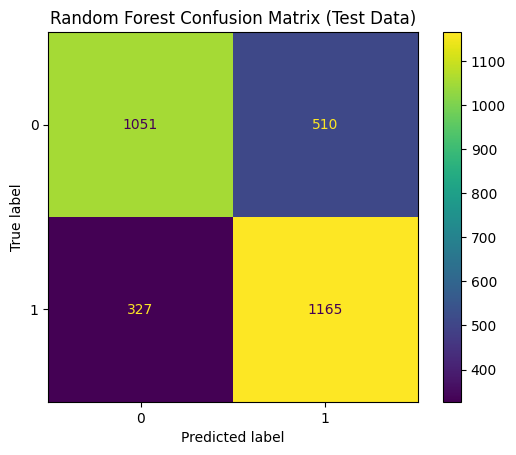

In [50]:
# Generate array of values for confusion matrix
#==> ENTER YOUR CODE HERE
cm = confusion_matrix(y_test, y_preds_rf, labels=rf_cv.classes_)

# Plot confusion matrix
#==> ENTER YOUR CODE HERE
disp = ConfusionMatrixDisplay(cm, display_labels=rf_cv.classes_)
disp.plot()
plt.title('Random Forest Confusion Matrix (Test Data)')

**Question:** What type of errors are more common for your model?

* The more common error is a *False Positive* (Type I error).
* This means the model more frequently predicts that a rider will be generous when, in fact, they are not.

##### Feature importance

Use the `feature_importances_` attribute of the best estimator object to inspect the features of your final model. You can then sort them and plot the most important ones.

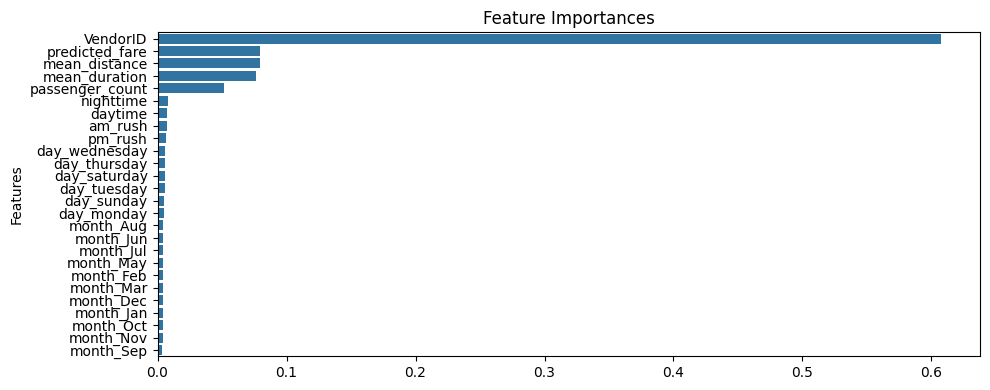

In [51]:
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(x=rf_importances.values, y=rf_importances.index, ax=ax)
ax.set_title("Feature Importances")
# ax.set_xlabel("Gini Importance")
ax.set_ylabel("Features")
plt.tight_layout()
plt.show()

<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 4. Conclusion**

In this step, use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**  

2. **What was your model doing? Can you explain how it was making predictions?**   

3. **Are there new features that you can engineer that might improve model performance?**   

4. **What features would you want to have that would likely improve the performance of your model?**   

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion. Even if you cannot use the model to make strong predictions, was the work done in vain? Consider any insights that you could report back to stakeholders.

**1.** I would recommend using this model for predicting whether a customer will leave a generous tip $(\geq 20\%)$. The model, a Random Forest Classifier, has been thoughtfully developed with several strengths that support its deployment:
* **Robust Preprocessing:** The dataset was carefully preprocessed by merging trip data with predicted fares and mean distances/durations, and filtering for credit card payments to ensure accurate tip data. This enhances the model's relevance to the target variable.
* **Effective Feature Engineering:** Key features such as tip percentage, time of day, and day of the week were engineered, providing the model with meaningful predictors of tipping behavior.
* **Optimized Performance:** Hyperparameter tuning via *GridSearchCV* ensures the model is fine-tuned for accuracy and generalization, while evaluation metrics (*accuracy*, *precision*, *recall*, *F1-score*, and *ROC-AUC*) indicate strong predictive capability.
* **Actionable Insights:** The feature importance analysis highlights influential factors like predicted fare, mean distance, and mean duration, offering practical insights for drivers and the New York City TLC.

However, deployment should come with caveats:
* **Ethical Oversight:** The model must be monitored to prevent unintended biases, such as associating certain neighborhoods with tipping behavior, which could lead to discriminatory service practices.
* **Continuous Updates:** Regular retraining with new data is necessary to maintain accuracy as tipping patterns evolve.

**2.** The model is a Random Forest Classifier designed to predict whether a customer will leave a generous tip $(\geq 20\%)$ — a binary classification task where the target variable generous is 1 (generous tip) or 0 (not generous).
* **How It Works:**
    * A Random Forest consists of multiple decision trees, each trained on a random subset of the data and features. Each tree makes an individual prediction (generous or not), and the final prediction is determined by a majority vote across all trees.
    * This ensemble approach reduces overfitting (a common issue with single decision trees) and improves accuracy by averaging out errors.
* **Input Features:**
The model uses features like `VendorID`, `predicted_fare`, `mean_distance`, `mean_duration`, `pickup_hour`, `pickup_dow` (day of the week), `trip_distance`, and `passenger_count`. These capture trip cost, length, timing, and customer details — factors likely to influence tipping.

**3.**
* **Weather Conditions:**
    * **Why:** Rainy or harsh weather might increase tips due to perceived driver effort.
    * **How:** Merge historical weather data (e.g., precipitation, temperature) with trip timestamps using the `tpep_pickup_datetime`.

* **Trip Speed Ratio:**
    * **Why:** A faster-than-expected trip might improve customer satisfaction, leading to higher tips.
    * **How:** Calculate `trip_speed_ratio` = `trip_distance` / (`actual_duration` / `mean_duration`) to compare actual trip efficiency against location-based averages.
    
* **Payment Convenience:**
    * **Why:** Credit card payments might correlate with higher tips due to ease of tipping electronically.
    * **How:** While already filtered for credit card payments, a feature comparing tip rates across payment types (if cash data were reintroduced for comparison) could be insightful.
    
**4.**
* **Customer Behavior:**
    * Historical tipping patterns to identify consistent generosity.
    * Ride frequency to gauge familiarity with the service.
    * Preferred payment method, as it might correlate with tipping habits.
* **Trip Characteristics:**
    * Time of day and day of the week to capture trends like higher tips during peak hours or weekends.
    * Route efficiency (actual vs. expected trip time) as a proxy for customer satisfaction.
* **External Factors:**
    * Weather conditions, which could affect mood or driver performance.
    * Traffic congestion levels, potentially influencing the trip experience.
    * Special events (e.g., holidays), which might prompt larger tips.
* **Feature Engineering:**
    * Interaction terms (e.g., $\text{trip distance} \times \text{time of day}$) to uncover complex relationships.
    * Polynomial features (e.g., squared trip duration) to model non-linear effects.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.